In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter


## Heading codes

Every register is classified with a customs code (also called heading) depending on the type of good it is. There are thousands of headings and multiple heading levels (see PDF 'Arancel de Aduanas 2022' in resources). A table with the codes and their related information is retrieved from http://www.aduanet.gob.pe/ol-ad-tg/ServletTGConsultaTablas

In [2]:
# Get a dataframe with the heading codes information
with open('../../data/temporal_landing/support/NANDINA.TXT', 'r') as f:
    file_lines = f.readlines()
    file_lines = [string.rstrip('\t\n') for string in file_lines][1:]
    file_lines = [string.split('\t') for string in file_lines]
    file_lines = [[element for element in inner_list if element.strip()] for inner_list in file_lines]

headings =  pd.DataFrame(file_lines, columns=['PARTIDA','DESCRIP','ADVAL','IGV','ISC','SEGURO','CUODE','CIIU','FINICIO', 'FFINAL'])

In [3]:
# A heading code is composed by 10 digits:
# 1st, 2nd : Harmonized System Chapter, determines a very generic classification level (applicable to WCO countries)
# 1st, 2nd, 3rd, 4th: Harmonized System Heading (applicable to WCO countries)
# 1st, 2nd, 3rd, 4th, 5th, 6th: Harmonized System Subheading (applicable to WCO countries)
# 1st, 2nd, 3rd, 4th, 5th, 6th, 7th, 8th: NANDINA Subheading (applicable in the Andean Community)
# 1st, 2nd, 3rd, 4th, 5th, 6th, 7th, 8th, 9th, 10th: National Subheading (applicable in Peru)

In [4]:
# Add zeros to the left of the headings column to match 10 digits, if necessary
headings['PARTIDA'] = headings['PARTIDA'].astype(str).str.zfill(10)
headings

,PARTIDA,DESCRIP,ADVAL,IGV,ISC,SEGURO,CUODE,CIIU,FINICIO,FFINAL
0,3926909030,ESCAFANDRAS Y MASCARAS DE PROTECCION,15,18,0,0,220,3560,19010101,19971231
1,3926909090,DEMAS MANUFACTURAS DE PLASTICO,25,18,0,0,220,3560,19010101,19971231
2,4001210000,HOJAS AHUMADAS,15,18,0,0,521,1110,19010101,19971231
3,4001220000,CAUCHOS TECNICAMENTE ESPECIFICADOS (TSNR),15,18,0,0,521,1110,19010101,19971231
4,4001291000,HOJAS DE CREPE,15,18,0,0,521,1110,19010101,19971231
...,...,...,...,...,...,...,...,...,...,...
24952,3002131000,- - - Para tratamiento oncológico o VIH,0,0,0,0,553,0,20170101,20211231
24953,3002141000,- - - Para tratamiento oncológico o VIH,0,0,0,0,553,0,20170101,20211231
24954,9811000000,- MATERIAL DE GUERRA ...,0,0,0,0,0,0,20220714,99991231
24955,0208900010,"- - CARNE DE CUY (COBAYO, CONEJILLO DE INDIAS)...",0,0,0,0,113,0,20220826,99991231


In [5]:
# See if there are duplicated headings
headings['PARTIDA'].value_counts()

9805000000    19
9806000000    18
7905000091     7
8473300000     6
9033000000     5
              ..
8483902001     1
8465100001     1
8419400001     1
8207400001     1
0208900090     1
Name: PARTIDA, Length: 12337, dtype: int64

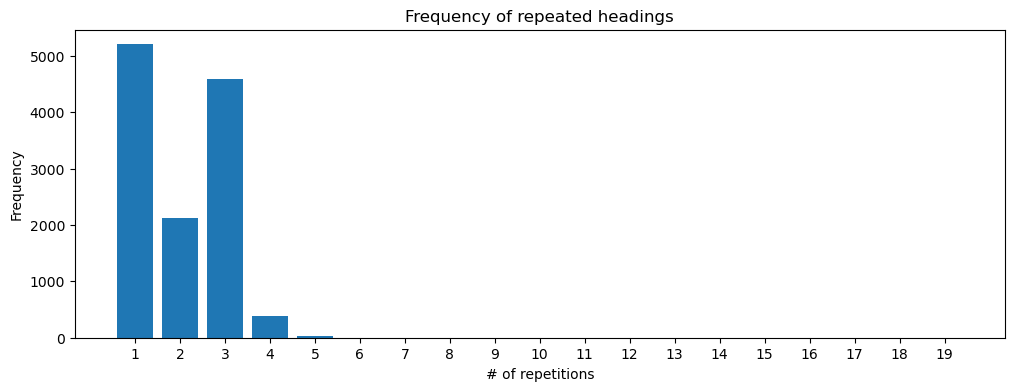

In [6]:
x_values = list(Counter(headings['PARTIDA'].value_counts().tolist()).keys())
y_values = list(Counter(headings['PARTIDA'].value_counts().tolist()).values())
plt.figure(figsize=(12, 4))
plt.bar(x_values,y_values)
plt.xticks(range(min(x_values), max(x_values)+1, 1))
# Add labels and title
plt.xlabel('# of repetitions')
plt.ylabel('Frequency')
plt.title('Frequency of repeated headings')
plt.show()

In [7]:
# Show an example of a duplicated heading
headings[headings['PARTIDA']=='7905000091']

,PARTIDA,DESCRIP,ADVAL,IGV,ISC,SEGURO,CUODE,CIIU,FINICIO,FFINAL
7305,7905000091,"- - Discos, hexagonos, cuya mayor di...",0,0,0,0,532,0,19980101,20020203
11956,7905000091,"DISCOS HEXAGONOS, CUYA MAYOR DIMENSION NO EXCE...",15,18,0,0,532,3720,19010101,19971231
15738,7905000091,"- - Discos, hexágonos, cuya mayor dimensión no...",0,0,0,0,532,0,20020204,20111231
20557,7905000091,- - Discos; hexágonos cuyo lado de mayor longi...,0,0,0,0,532,0,20120101,20141106
22657,7905000091,- - DISCOS; HEXAGONOS CUYO LADO DE MAYOR LONGI...,0,0,0,0,532,0,20141108,20141218
22706,7905000091,- - Discos cuyo diámetro no exceda de 30 mm; h...,0,0,0,0,532,0,20141219,99991231
23004,7905000091,- - DISCOS CUYO DIAMETRO NO EXCEDA DE 30 MM;HE...,0,0,0,0,532,0,20141107,20141107


In [8]:
# The description column gives about the same information in all cases. There are slight details that may change but in general the texts are very similar. It would be useful to consolidate all of them in a single text that represents all of them. Some approaches as Abstract Summarization using Transformers might be explored, however since the language of the data is spanish, there aren't many trained models that can perform this task.

In [9]:
# Headings to work with:
# 07XXXXXXXX: Hortalizas, plantas, raíces y tubérculos alimenticios
# 08XXXXXXXX: Frutas y frutos comestibles; cortezas de agrios (cítricos), melones o sandías.

hs_to_work = ['07', '08']

headings[headings['PARTIDA'].str.startswith(tuple(hs_to_work))].sort_values(by='PARTIDA', ascending=True)

,PARTIDA,DESCRIP,ADVAL,IGV,ISC,SEGURO,CUODE,CIIU,FINICIO,FFINAL
1225,0701100000,PAPAS(PATATAS) FRESCAS O REFRIGERADOS PARA SIE...,25,0,0,0,421,1110,19010101,19971231
8995,0701100000,- Para siembra,0,0,0,0,421,0,19980101,20020203
13203,0701100000,- Para siembra,0,0,0,0,423,0,20020204,99991231
20006,0701900000,- Las demás,0,0,0,0,111,0,20020204,99991231
5718,0701900000,- Las demas,0,0,0,0,111,0,19980101,20020203
...,...,...,...,...,...,...,...,...,...,...
20143,0813500000,"- Mezclas de frutas u otros frutos, secos, o d...",0,0,0,0,113,0,20020204,99991231
6039,0814000000,"Cortezas de agrios (citricos), melones o sandi...",0,0,0,0,512,0,19980101,20020203
1529,0814000000,"CORTEZAS DE AGRIOS,MELONES, INCLU. LAS SANDIAS...",25,18,0,0,512,3113,19010101,19971231
13703,0814001000,"- De limón (limón sutil, limón común, limón cr...",0,0,0,0,512,0,20020204,99991231
